In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("housing.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
train_data= X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19958,-119.32,36.21,29.0,7.107425,5.451038,6.429719,5.509388,3.3125,INLAND,78300.0
10302,-117.80,33.89,25.0,8.046229,5.945421,7.153834,5.966147,7.0217,<1H OCEAN,357900.0
15456,-117.28,33.18,16.0,8.007367,6.383507,6.736967,6.289716,2.1205,NEAR OCEAN,157300.0
11873,-117.37,34.00,36.0,6.594413,5.049856,6.167516,4.962845,2.4306,INLAND,88900.0
9559,-120.60,37.37,10.0,8.031385,6.212606,7.221836,6.190315,4.6667,INLAND,130100.0
...,...,...,...,...,...,...,...,...,...,...
5797,-118.24,34.14,36.0,7.503290,6.329721,7.314553,6.300786,1.9125,<1H OCEAN,238000.0
5457,-118.47,34.00,41.0,7.754482,6.456770,7.517521,6.287859,2.2880,<1H OCEAN,263500.0
7378,-118.24,33.97,43.0,7.213768,5.857933,7.413367,5.805135,2.0819,<1H OCEAN,111800.0
8773,-118.35,33.80,32.0,7.268920,5.693732,6.511745,5.655992,4.8750,<1H OCEAN,311700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

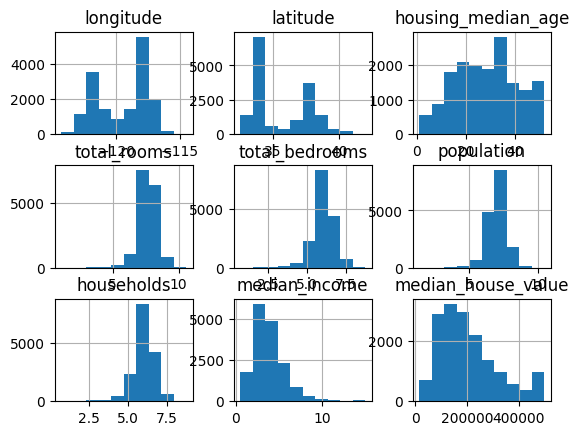

In [ ]:
train_data.hist()

<Axes: >

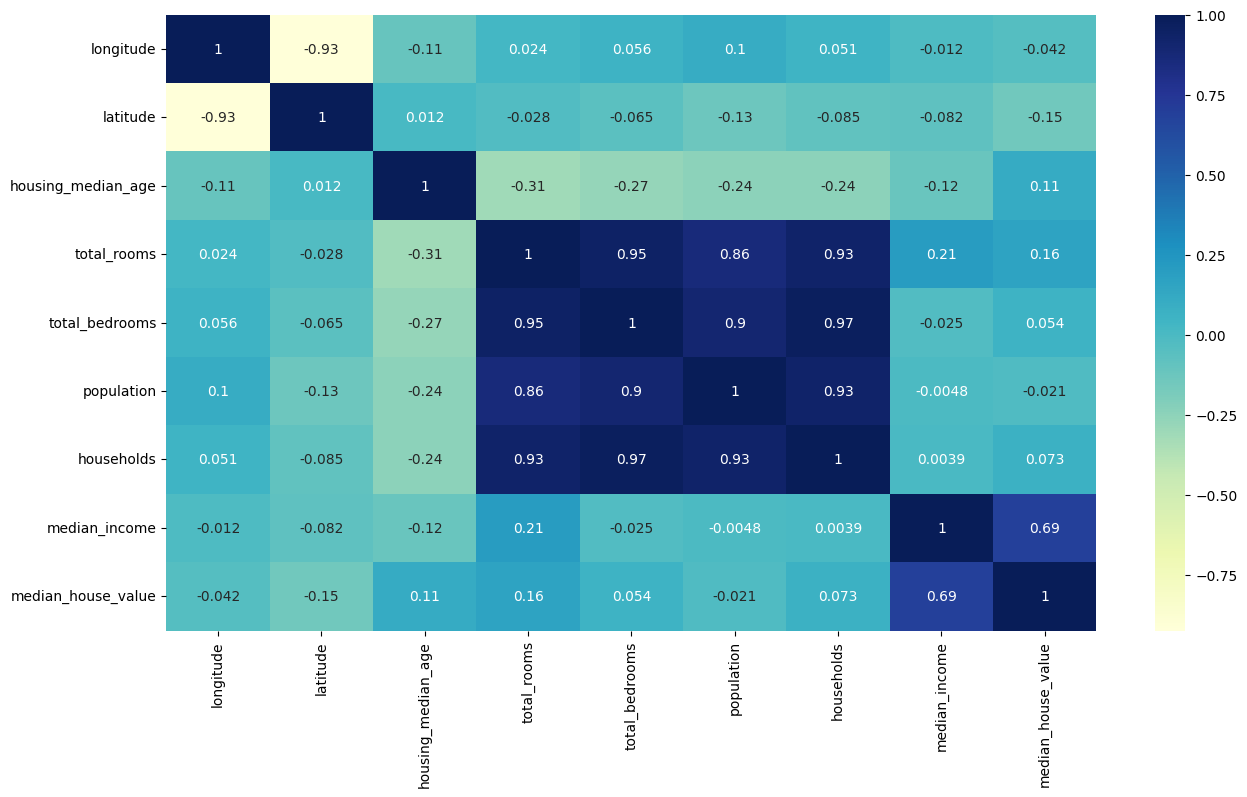

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

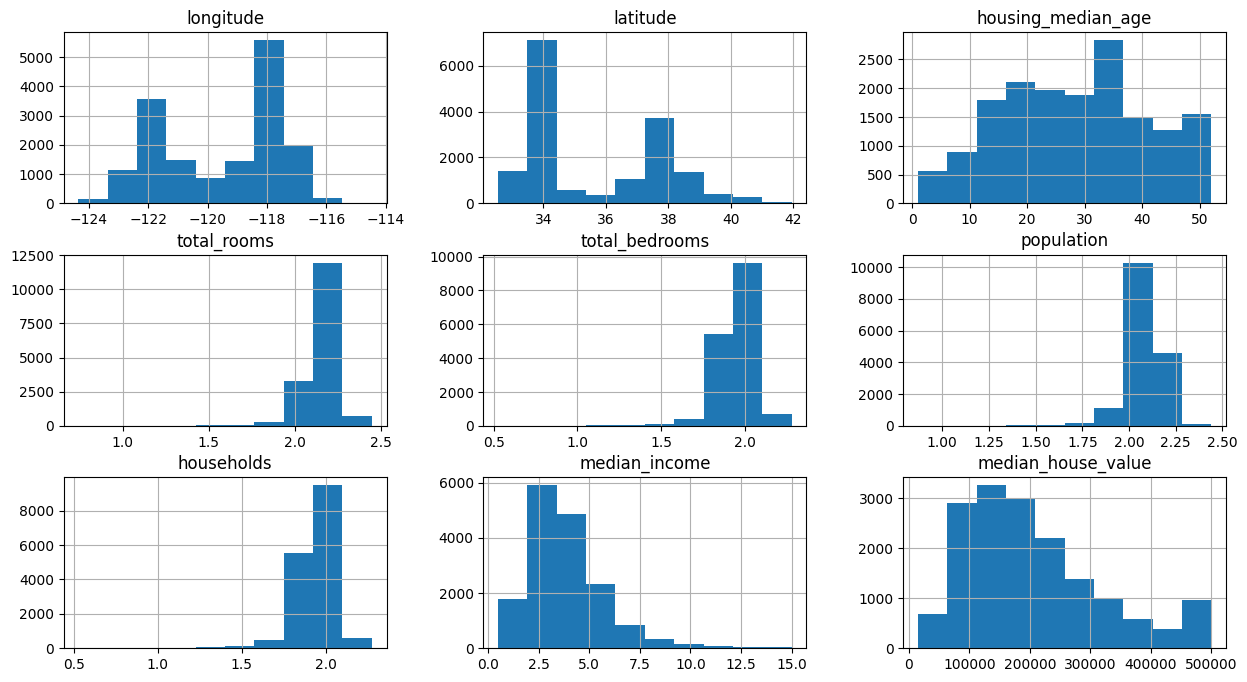

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies(data['ocean_proximity'], dtype=int)).drop(['ocean_proximity'], axis=1)

<Axes: >

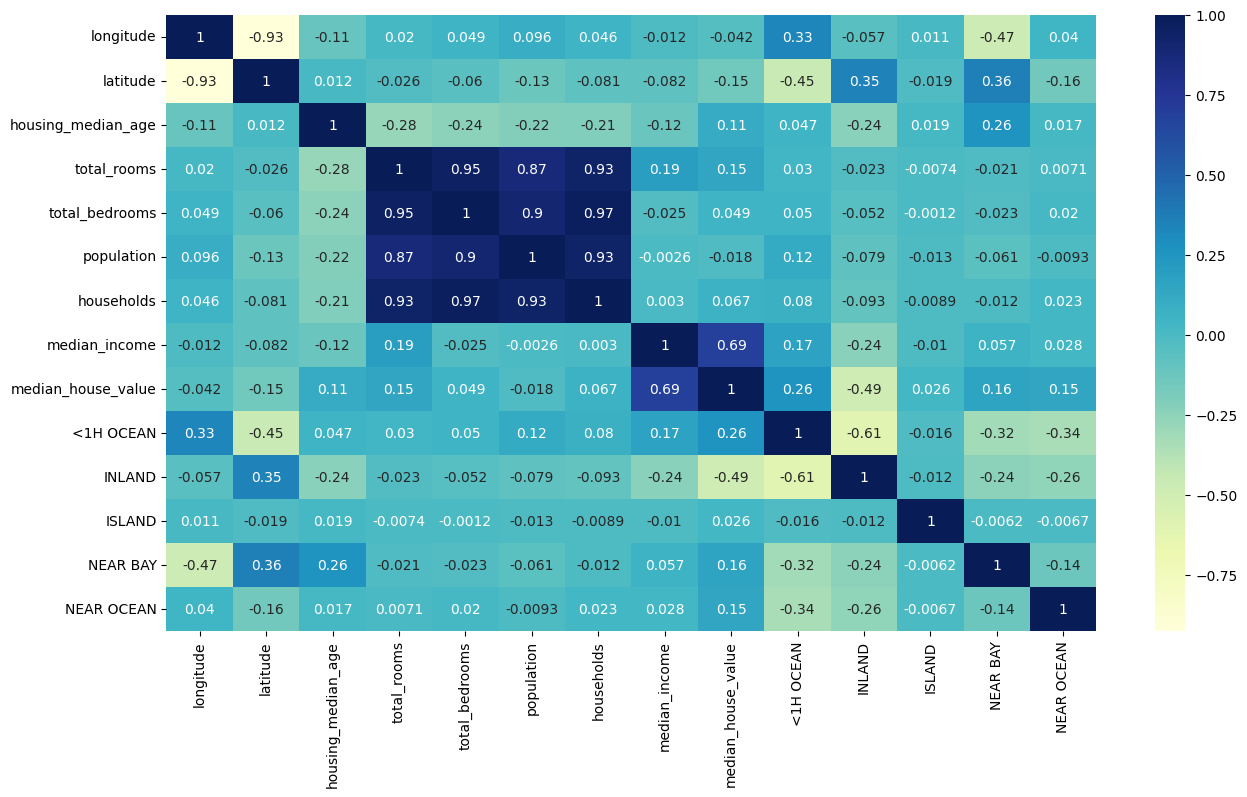

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

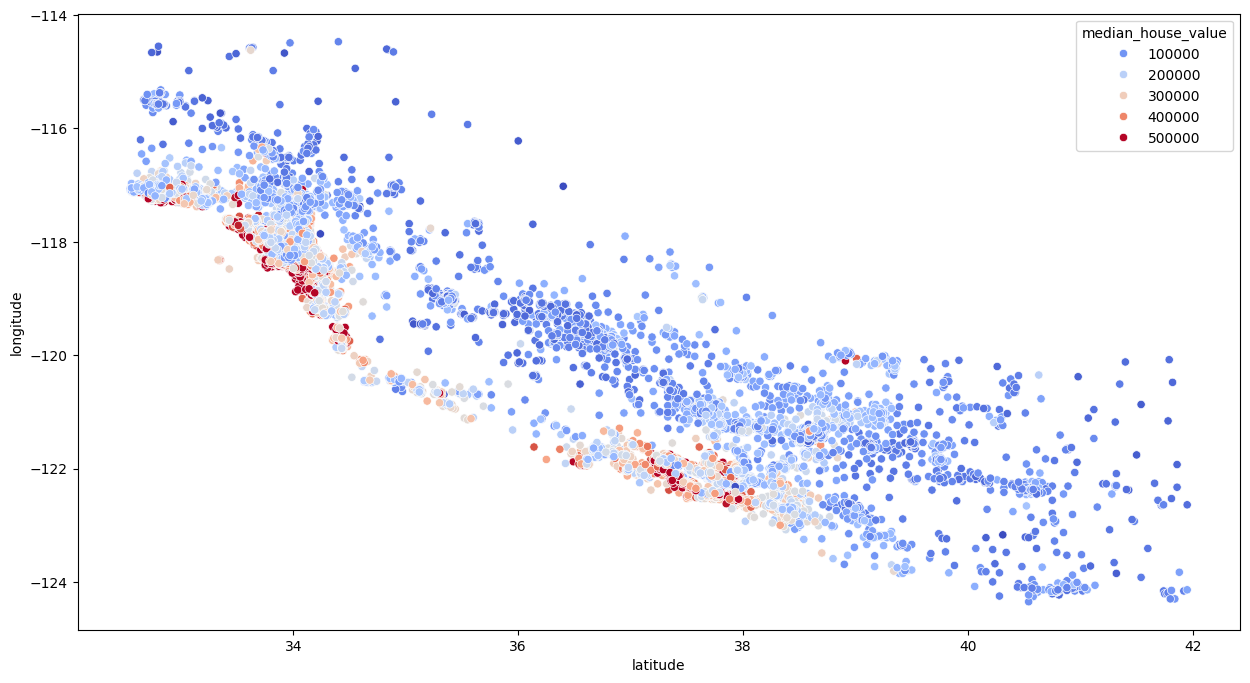

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data['bedroom_ration'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']